In [324]:
import configparser
import tweepy
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from wordcloud import WordCloud
import nltk 
from nltk.tokenize.toktok import ToktokTokenizer
tokenizer = ToktokTokenizer()
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/nust61/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [325]:
# ___Cell no. 2___

# We then import the credentials
import twitter_credentials as tc

In [326]:
config = configparser.ConfigParser()
config.read('config.ini')

# authenticate
auth = tweepy.OAuthHandler(tc.api_key, tc.api_secret_key)
auth.set_access_token(tc.access_token, tc.access_token_secret)

api = tweepy.API(auth)

In [327]:
search_words = "SWAPO OR swapo OR Swapo"

# Latitude, logitude and search radius(km) for Zambia and some surrounding regions
loc = "-22.5716425,17.0585621,1000km"

# Search dates
date_since = "2022-04-20"
date_until = "2022-04-27"

my_search = search_words + " -filter:retweets" 

In [328]:
public_tweets = tweepy.Cursor(api.search,
                       q=my_search,
                       lang="en",
                       tweet_mode='extended',
                       geocode=loc,
                       
                       ).items(1000)

In [329]:
import pandas as pd

# create dataframe
columns = ['Time','User','Location', 'Tweet']

data = []
for tweet in public_tweets:
    data.append([tweet.created_at,tweet.user.screen_name, tweet.user.location,tweet.full_text])

df = pd.DataFrame(data, columns=columns)



In [330]:
df

,Time,User,Location,Tweet
0,2022-04-27 08:39:28,NewEraNewspaper,Namibia,Urban and rural development executive director...
1,2022-04-27 08:19:52,namibiansun,Namibia,CONSENT OR NOT: Swapo member of parliament Pat...
2,2022-04-27 05:22:43,lamek94,Windhoek,@TheNamibian We must not blame Mr Ekandjo! Eve...
3,2022-04-27 03:00:06,sinut69,Namibia,@TheNamibian How can you call it a National Fl...
4,2022-04-26 21:47:25,__evuleMoses_,oshakati,@leevi_immanuel He who that benefits from Swap...
...,...,...,...,...
145,2022-04-19 09:42:44,SilasNdakolo,Namibia,@tukondjeni I blame our public relations team ...
146,2022-04-19 09:31:50,MevrouS,Namibia,"@_Mekondjo In most cases, our complaints are n..."
147,2022-04-19 09:27:59,EagleFMNam,Namibia,"Swapo's Oshana Regional Coordinator, Samuel Ne..."
148,2022-04-19 09:17:45,AsserNtinda,"Windhoek, Namibia","Cde @Netumbondaitwah, can you ask Pres @hagege..."


In [331]:
## Cleaning the Data

In [332]:
def clean_text(text):
    
    """
    A function to clean the tweet text
    """
    #Remove hyper links
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    
    #Remove @mentions
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text)
    
    #Remove anything that isn't a letter, number, or one of the punctuation marks listed
    text = re.sub(r"[^A-Za-z0-9#'?!,.]+", ' ', text)   
    
    return text

In [333]:
df['Tweet']=df['Tweet'].apply(clean_text)

In [334]:
##this sets all text to lower case
df['Tweet']=df['Tweet'].str.lower()


In [335]:
#add stopwords using a stopwords dictionary
stopwords = stopwords.words("english")

In [336]:
# Define our own list of stopwords
my_stopwords = ['coronavirus','covid','pandemic','covid19','lockdown','amp','via']

# Extend the nltk stopwords list
stopwords.extend(my_stopwords)

In [337]:
def remove_stopwords(text):
    
    """
    A function to remove stop words
    """
    
    # Tokenize the text
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stopwords]
    filtered_text = ' '.join(filtered_tokens)    
    
    return filtered_text

In [338]:
# Apply the stopword removal function to the text of all tweets
df['Tweet']=df['Tweet'].apply(remove_stopwords)


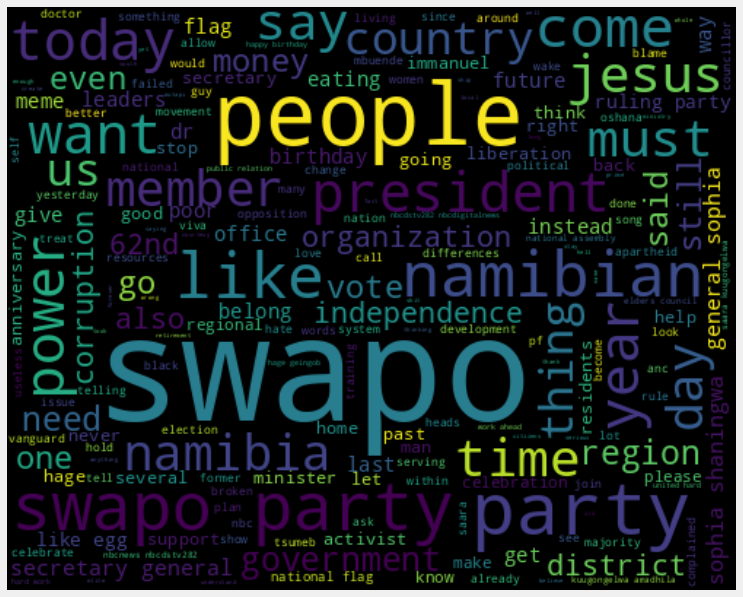

In [339]:
# Plot a word cloud

all_words = ' '.join( [data for data in df['Tweet']])
word_cloud = WordCloud(width=500, height=400, random_state=21, max_font_size = 100,
                       stopwords=stopwords).generate(all_words)

plt.figure(figsize = (20,10))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Data Has Been Prepped!

In [340]:
df.to_csv('tweets.csv')